# Modeling Exercises

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

from pydataset import data

from mall_wrangle import wrangle_mall_df

## Get Data

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Prepare data

### Let's fix the column names by making everything lower case and replacing the dot separator with and underscore

In [3]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
X = df[['petal_length', 'petal_width']]
X.head()

,petal_length,petal_width
1,1.4,0.2
2,1.4,0.2
3,1.3,0.2
4,1.5,0.2
5,1.4,0.2


## Modeling

### Create and Fit cluster model

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Add cluster to our original data

In [6]:
df['cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


### Visualize Clusters

In [7]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.96
virginica,6.588,2.974,5.552,2.026,1.08


[Text(0.5, 1.0, 'K-Means Clusters')]

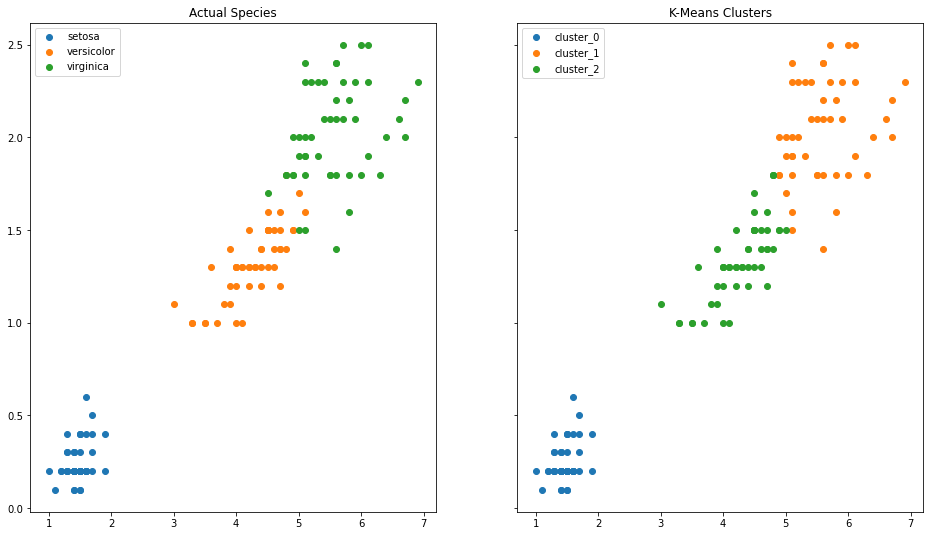

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    axs[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0].legend()
axs[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    axs[1].scatter(df[df.cluster == cluster_n].petal_length, df[df.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[1].legend()
axs[1].set(title="K-Means Clusters")

### Use elbow method to determine cluster number

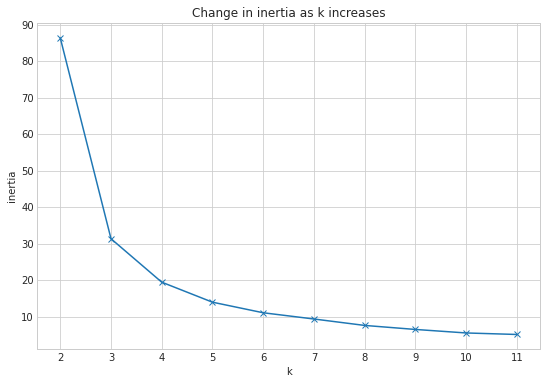

In [9]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### This graph seems to show a drop off in inertia around **k=4** so let's look at around there to see what seems best

### Visuals cluster around k=4

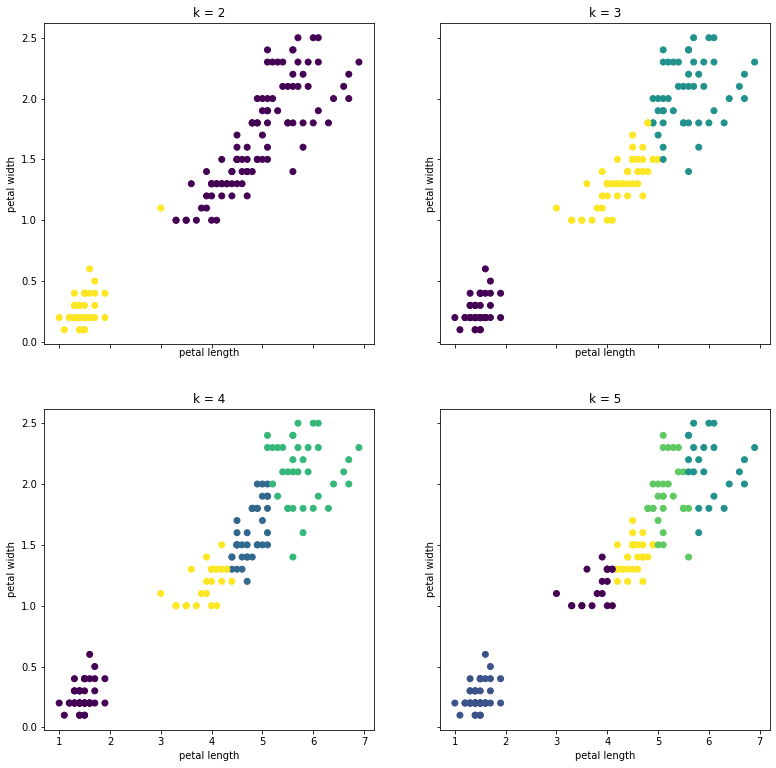

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_length, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal length', ylabel='petal width')

### Clustering on 3 features

In [11]:
X = df[['petal_length', 'petal_width', 'sepal_length']]
X.head()

,petal_length,petal_width,sepal_length
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0


In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [13]:
df['three_feature_cluster'] = clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,three_feature_cluster
1,5.1,3.5,1.4,0.2,setosa,0,0
2,4.9,3.0,1.4,0.2,setosa,0,0
3,4.7,3.2,1.3,0.2,setosa,0,0
4,4.6,3.1,1.5,0.2,setosa,0,0
5,5.0,3.6,1.4,0.2,setosa,0,0


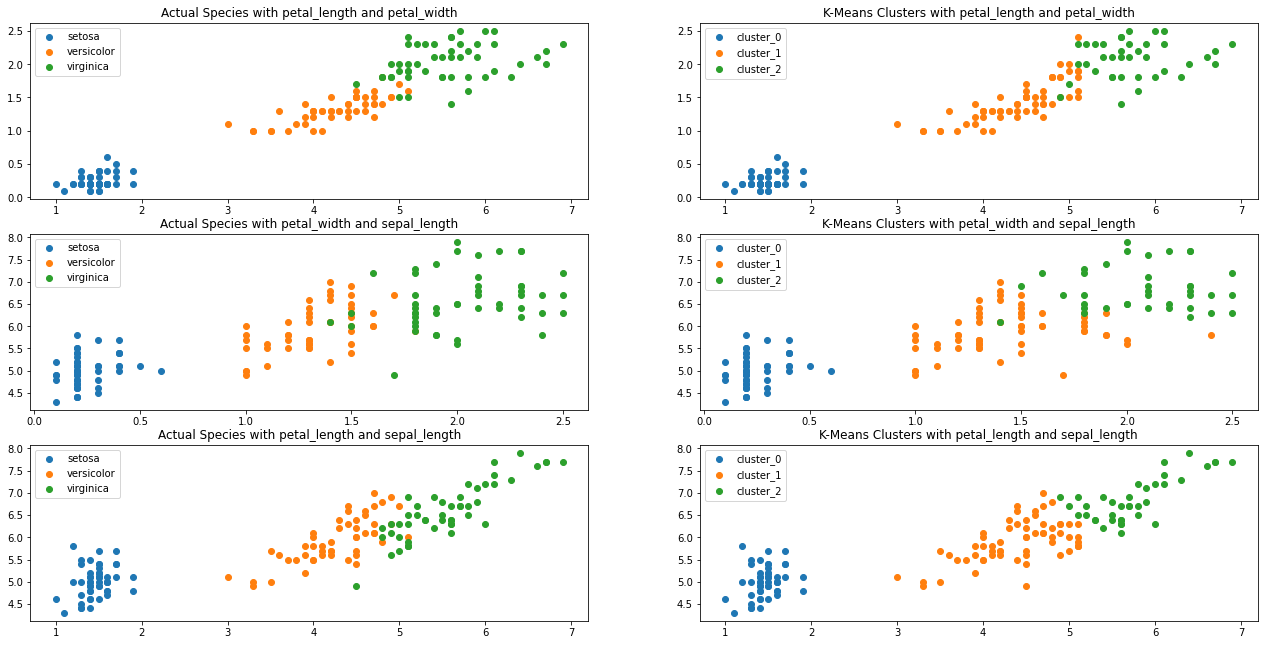

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(22, 11))

for species, subset in df.groupby('species'):
    axs[0,0].scatter(subset.petal_length, subset.petal_width, label=species)
    
axs[0,0].legend()
axs[0,0].set(title='Actual Species with petal_length and petal_width')
    
for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[0,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

axs[0,1].legend()
axs[0,1].set(title="K-Means Clusters with petal_length and petal_width")

for species, subset in df.groupby('species'):
    axs[1,0].scatter(subset.petal_width, subset.sepal_length, label=species)
    
axs[1,0].legend()
axs[1,0].set(title='Actual Species with petal_width and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[1,1].scatter(df[df.three_feature_cluster == cluster_n].petal_width, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[1,1].legend()
axs[1,1].set(title="K-Means Clusters with petal_width and sepal_length")

for species, subset in df.groupby('species'):
    axs[2,0].scatter(subset.petal_length, subset.sepal_length, label=species)
    
axs[2,0].legend()
axs[2,0].set(title='Actual Species with petal_length and sepal_length')

for cluster_n in df.three_feature_cluster.sort_values().unique():
    axs[2,1].scatter(df[df.three_feature_cluster == cluster_n].petal_length, df[df.three_feature_cluster == cluster_n].sepal_length, label=f'cluster_{cluster_n}')

axs[2,1].legend()
axs[2,1].set(title="K-Means Clusters with petal_length and sepal_length")

plt.show()

## Clustering the Mall Dataset

### Bring in our modeling data

In [15]:
scaler, train, validate, test = wrangle_mall_df()
train.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
182,32,97,86,0
49,29,40,42,0
35,49,33,14,0
186,30,99,97,1
114,19,64,46,1


### Let's take a quick look at our data

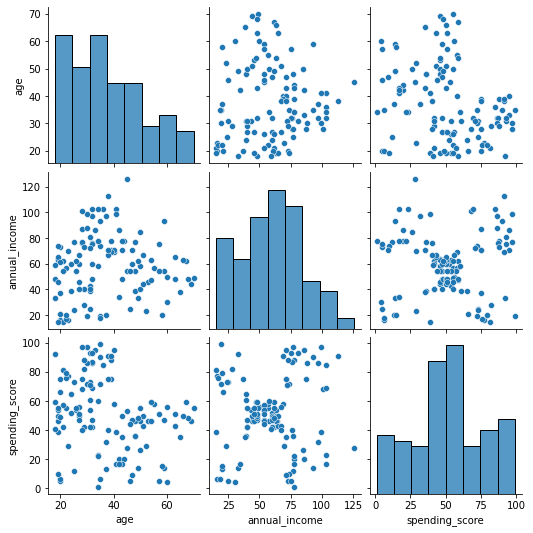

In [16]:
sns.pairplot(train.drop(columns='is_male'))

### I see a really nice X shape in the combonation of spending score and annual_income, so let's start with clustering on those features

In [17]:
X = train[['spending_score', 'annual_income']]
X.head()

,spending_score,annual_income
customer_id,,
182,86,97
49,42,40
35,14,33
186,97,99
114,46,64


### Create our clusters

In [18]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([2, 4, 3, 2, 4, 4, 2, 0, 1, 1, 1, 2, 4, 3, 0, 1, 0, 0, 0, 1, 3, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 0, 4, 4, 2, 4, 4, 4, 0, 4, 1, 4, 0, 0, 4,
       4, 4, 4, 0, 0, 3, 1, 2, 2, 4, 0, 0, 4, 3, 0, 4, 4, 4, 2, 3, 2, 4,
       4, 2, 2, 4, 2, 2, 3, 4, 4, 0, 2, 2, 4, 4, 4, 4, 2, 4, 4, 1, 3, 4,
       4, 1, 4, 4, 4, 2, 4, 1, 4, 2, 1, 4, 1, 4, 4, 0, 4, 4, 0, 2, 4, 4,
       0, 0, 2, 4, 2, 0, 2, 4], dtype=int32)

### Add our clusters onto the training set

In [19]:
train['cluster'] = clusters
train.head()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
182,32,97,86,0,2
49,29,40,42,0,4
35,49,33,14,0,3
186,30,99,97,1,2
114,19,64,46,1,4


### Visualize our clusters

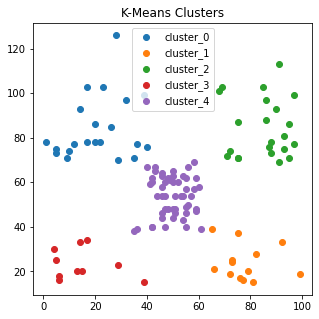

In [20]:
plt.figure(figsize=(5, 5))

for cluster_n in train.cluster.sort_values().unique():
    plt.scatter(train[train.cluster == cluster_n].spending_score, train[train.cluster == cluster_n].annual_income, label=f'cluster_{cluster_n}')

plt.legend()
plt.title("K-Means Clusters")
plt.show()

### Use the elbow method to determine if we have the appropriate number of clusters

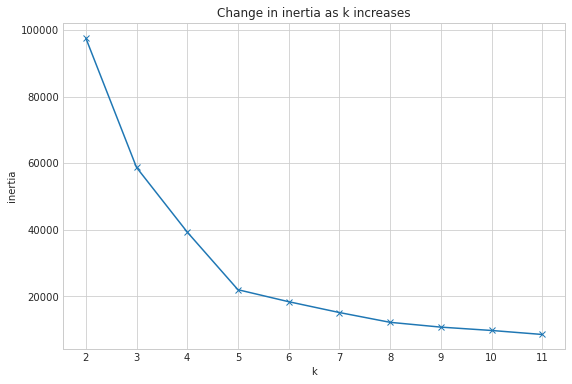

In [21]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### This seem to show the elbow around five so lets check around there

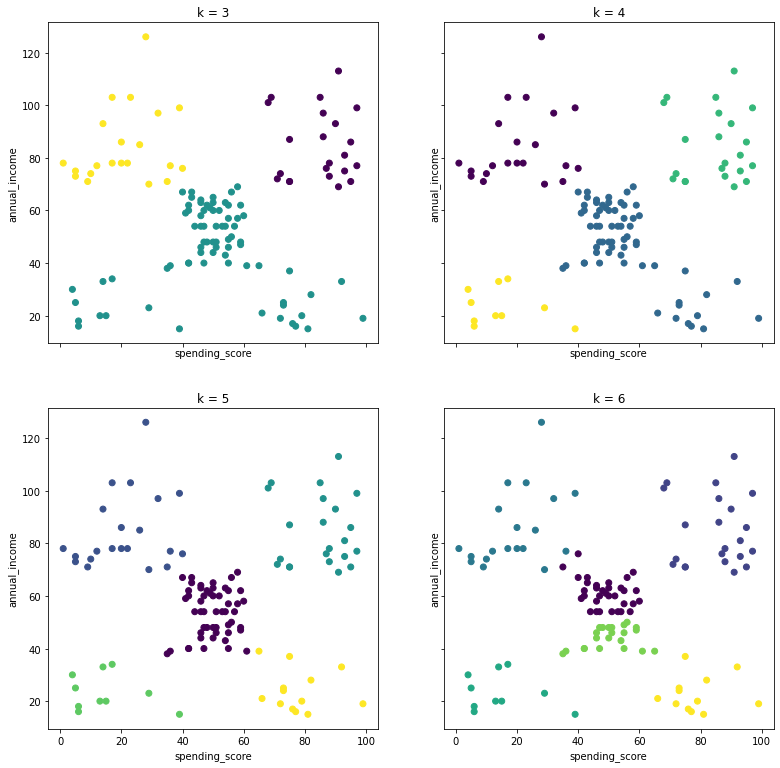

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.spending_score, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='annual_income')

#### It looks like 5 clusters is good for capturing distinct groups in our data

## Clustering the Scaled Mall Dataset (Does scaling make a difference?)

In [23]:
train.head()

,age,annual_income,spending_score,is_male,cluster
customer_id,,,,,
182,32,97,86,0,2
49,29,40,42,0,4
35,49,33,14,0,3
186,30,99,97,1,2
114,19,64,46,1,4


In [24]:
train2 = train.drop(columns='cluster').copy()

In [25]:
train2.head()

,age,annual_income,spending_score,is_male
customer_id,,,,
182,32,97,86,0
49,29,40,42,0
35,49,33,14,0
186,30,99,97,1
114,19,64,46,1


In [26]:
scaler = MinMaxScaler()

scaler.fit(train2)

train_scaled = scaler.transform(train2)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

train_scaled

array([[0.26923077, 0.73873874, 0.86734694, 0.        ],
       [0.21153846, 0.22522523, 0.41836735, 0.        ],
       [0.59615385, 0.16216216, 0.13265306, 0.        ],
       [0.23076923, 0.75675676, 0.97959184, 1.        ],
       [0.01923077, 0.44144144, 0.45918367, 1.        ],
       [0.51923077, 0.35135135, 0.53061224, 0.        ],
       [0.34615385, 0.79279279, 0.85714286, 0.        ],
       [0.78846154, 0.7027027 , 0.13265306, 1.        ],
       [0.11538462, 0.21621622, 0.65306122, 0.        ],
       [0.03846154, 0.1981982 , 0.75510204, 0.        ],
       [0.32692308, 0.03603604, 1.        , 0.        ],
       [0.19230769, 0.64864865, 0.75510204, 1.        ],
       [0.11538462, 0.40540541, 0.52040816, 1.        ],
       [0.53846154, 0.09009009, 0.04081633, 0.        ],
       [0.46153846, 0.63963964, 0.19387755, 1.        ],
       [0.03846154, 0.05405405, 0.66326531, 1.        ],
       [0.13461538, 0.55855856, 0.1122449 , 1.        ],
       [0.03846154, 0.52252252,

In [27]:
train_scaled = pd.DataFrame(train_scaled, columns=train2.columns.values).set_index([train2.index.values])
validate_scaled = pd.DataFrame(validate_scaled, columns=validate.columns.values).set_index([validate.index.values])
test_scaled = pd.DataFrame(test_scaled, columns=test.columns.values).set_index([test.index.values])

In [28]:
train_scaled.head()

,age,annual_income,spending_score,is_male
182,0.269231,0.738739,0.867347,0.0
49,0.211538,0.225225,0.418367,0.0
35,0.596154,0.162162,0.132653,0.0
186,0.230769,0.756757,0.979592,1.0
114,0.019231,0.441441,0.459184,1.0


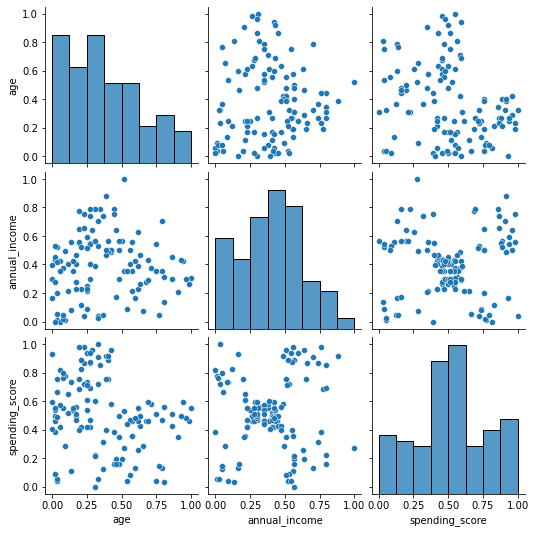

In [29]:
sns.pairplot(train_scaled.drop(columns='is_male'))

In [30]:
X = train_scaled[['spending_score', 'annual_income']]
X.head()

,spending_score,annual_income
182,0.867347,0.738739
49,0.418367,0.225225
35,0.132653,0.162162
186,0.979592,0.756757
114,0.459184,0.441441


In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

clusters = kmeans.predict(X)
clusters

array([1, 4, 0, 1, 4, 4, 1, 2, 3, 3, 3, 1, 4, 0, 2, 3, 2, 2, 2, 3, 0, 4,
       2, 0, 4, 4, 3, 4, 0, 4, 2, 4, 4, 1, 4, 4, 4, 2, 4, 3, 4, 2, 2, 4,
       4, 4, 4, 2, 2, 0, 3, 1, 1, 4, 2, 2, 4, 0, 2, 4, 4, 4, 1, 0, 1, 4,
       4, 1, 1, 4, 1, 1, 0, 4, 4, 2, 1, 1, 4, 4, 4, 4, 1, 4, 4, 3, 0, 4,
       4, 3, 4, 4, 4, 1, 4, 3, 4, 1, 3, 4, 3, 4, 4, 2, 4, 4, 2, 1, 4, 4,
       2, 2, 1, 4, 1, 2, 1, 4], dtype=int32)

In [32]:
train_scaled['cluster'] = clusters
train_scaled.head()

,age,annual_income,spending_score,is_male,cluster
182,0.269231,0.738739,0.867347,0.0,1
49,0.211538,0.225225,0.418367,0.0,4
35,0.596154,0.162162,0.132653,0.0,0
186,0.230769,0.756757,0.979592,1.0,1
114,0.019231,0.441441,0.459184,1.0,4


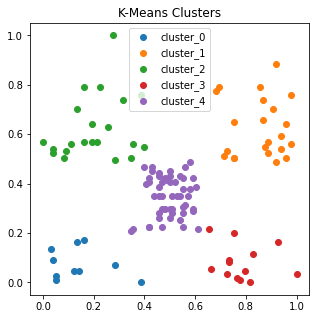

In [33]:
plt.figure(figsize=(5, 5))

for cluster_n in train_scaled.cluster.sort_values().unique():
    plt.scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("K-Means Clusters")
plt.show()

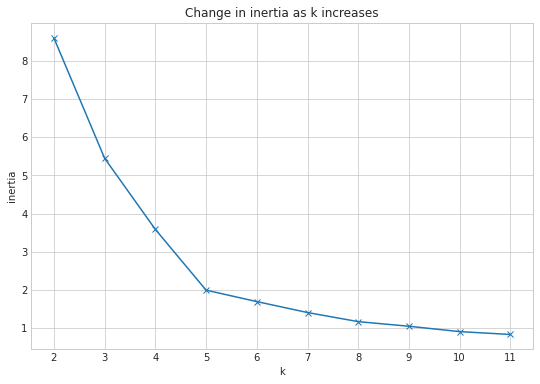

In [34]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

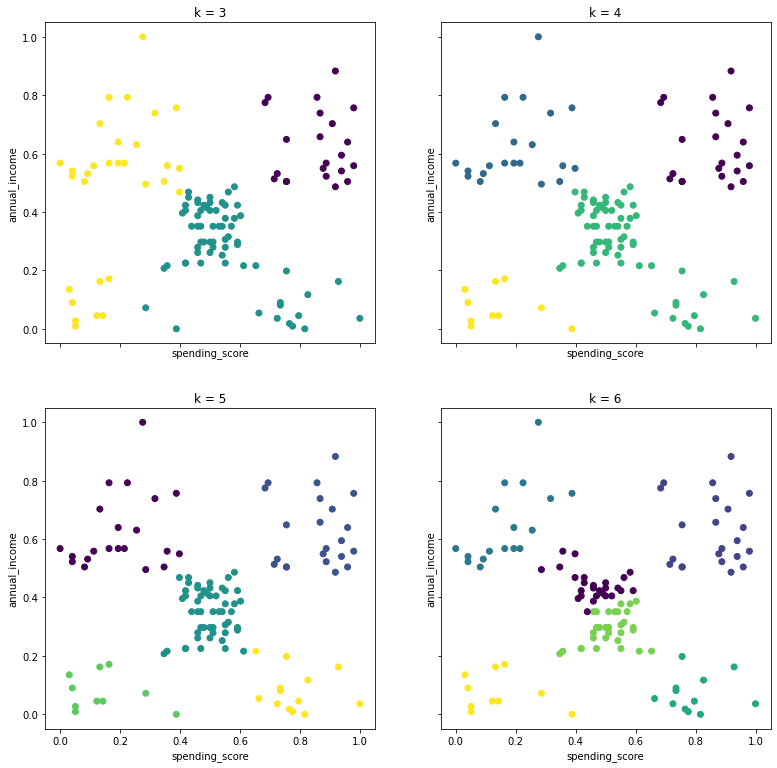

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(3, 7)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.spending_score, X.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='spending_score', ylabel='annual_income')

## Did scaling change our clusters

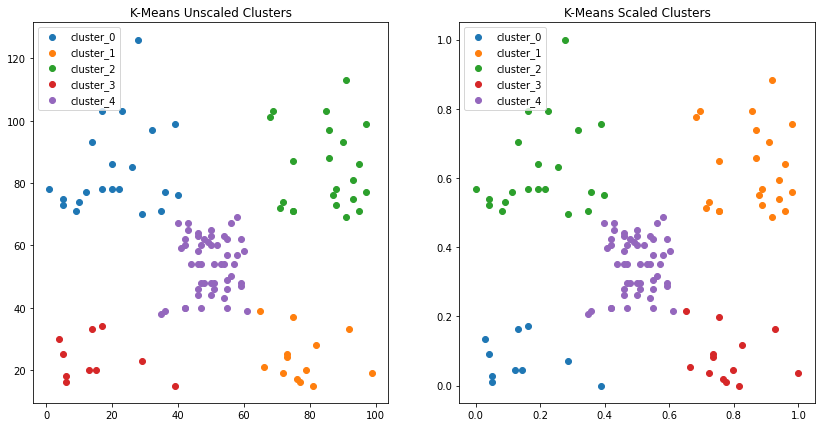

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

for cluster_n in train.cluster.sort_values().unique():
    axs[0].scatter(train[train.cluster == cluster_n].spending_score, 
                train[train.cluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )
axs[0].legend()
axs[0].set(title="K-Means Unscaled Clusters")

for cluster_n in train_scaled.cluster.sort_values().unique():
    axs[1].scatter(train_scaled[train_scaled.cluster == cluster_n].spending_score, 
                train_scaled[train_scaled.cluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )
axs[1].legend()
axs[1].set(title="K-Means Scaled Clusters")
plt.show()

## DBSCAN

Lets try a similar process with DBSCAN. 

In [37]:
dbscan = DBSCAN(algorithm='auto', min_samples=4, eps=5)

In [38]:
dbscan.fit(train[['spending_score', 'annual_income']])

DBSCAN(eps=5, min_samples=4)

In [39]:
train['dbcluster'] = dbscan.labels_

DBSCAN assigns a value of `-1` to the cluster label of an observation that is considered "noise".

In [40]:
train.head()

,age,annual_income,spending_score,is_male,cluster,dbcluster
customer_id,,,,,,
182,32,97,86,0,2,-1
49,29,40,42,0,4,0
35,49,33,14,0,3,-1
186,30,99,97,1,2,-1
114,19,64,46,1,4,0


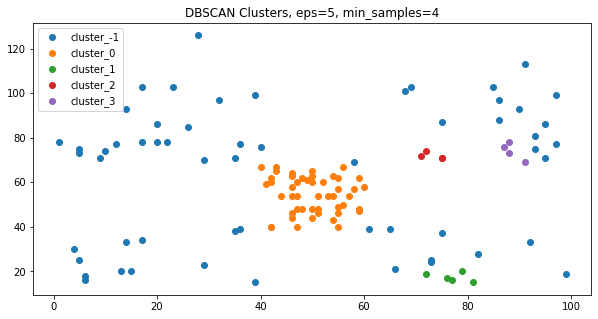

In [41]:
plt.figure(figsize=(10, 5))

for cluster_n in train.dbcluster.sort_values().unique():
    plt.scatter(train[train.dbcluster == cluster_n].spending_score, 
                train[train.dbcluster == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("DBSCAN Clusters, eps=5, min_samples=4")
plt.show()

Okay, maybe we need to tune our DBSCAN a bit. There are two primary hyperparameters:

$\epsilon$ (epsilon): The distance scanned to identify if an adjacent observation is part of the same cluster.

min_samples: The minimum number of datapoints that need to be closely grouped (determined by epsilon) before they are given their unique cluster identity/label.

### min-samples

Finding the optimal min-samples is a bit of trial and error, but there are some rules of thumb:

- For two-dimensional data (only clustering on two features), use the default setting (min_samples = 4)
- For data with more than two dimensions, choose 2 * the number of dimensions
- If the data is noisy, choose a larger value for min_samples

For our purposes, we will stick with the default. 

### $\epsilon$ (epsilon)

Finding the optimal value for epsilon can be handled according to [this paper](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf).

To find the optimal value for $\epsilon$, we are going to create an elbow plot. We start by training a KNN model, and set the value of `k` equal to 2:

In [42]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(train[['spending_score', 'annual_income']])

KNN will calculate for us the average distance between each point in the data set and its nearest neighbor:

In [43]:
distances, indices = neighbors_fit.kneighbors(train[['spending_score', 'annual_income']])

In the array that is created, each row is an observation. 

|0|1|
|---|---|
|Distance to self|Distance to 1st closest neighbor|

In [44]:
distances[:10] 

array([[ 0.        ,  5.65685425],
       [ 0.        ,  0.        ],
       [ 0.        ,  3.16227766],
       [ 0.        ,  9.21954446],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  6.08276253],
       [ 0.        ,  9.21954446],
       [ 0.        ,  4.        ],
       [ 0.        , 10.19803903]])

In [45]:
distances.shape

(118, 2)

We are now going to sort each column vertically. 

In [46]:
distances = np.sort(distances, axis=0)

In [47]:
distances

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.41421356],
       [ 0.        ,

In [48]:
distances.shape

(118, 2)

Now lets just create a long 1-D list of all of the values:

In [49]:
distances = distances[:,1]

In [50]:
distances

array([ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.41421356,  1.41421356,
        1.41421356,  1.41421356,  1.41421356,  1.41421356,  1.41421356,
        1.41421356,  1.41421356,  1.41421356,  1.41421356,  1.41421356,
        1.41421356,  2.        ,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  2.        ,
        2.        ,  2.        ,  2.        ,  2.        ,  2.        ,
        2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.23606798,
        2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.23606798,
        2.23606798,  2.82842712,  2.82842712,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.16227766,  3.16

In [51]:
distances.shape

(118,)

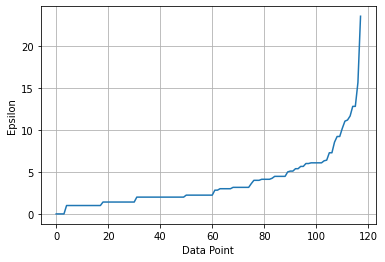

In [52]:
plt.plot(distances)
plt.xlabel('Data Point')
plt.ylabel('Epsilon')
plt.grid(True)

The ideal value for $\epsilon$ is the elbow of the curve. For the example above, it looks like 6 is a decent value.

In [53]:
dbscan2 = DBSCAN(algorithm='auto', min_samples=4, eps=6)
dbscan2.fit(train[['spending_score', 'annual_income']])
train['dbcluster2'] = dbscan2.labels_
train.head()

,age,annual_income,spending_score,is_male,cluster,dbcluster,dbcluster2
customer_id,,,,,,,
182,32,97,86,0,2,-1,-1
49,29,40,42,0,4,0,0
35,49,33,14,0,3,-1,-1
186,30,99,97,1,2,-1,-1
114,19,64,46,1,4,0,0


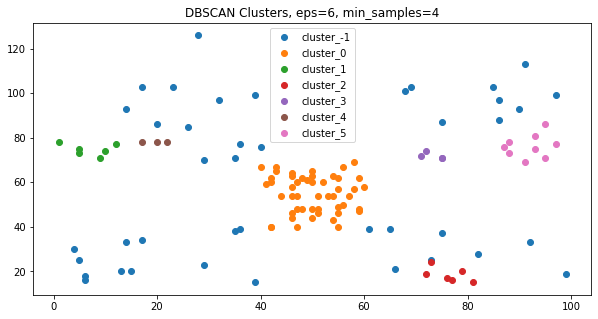

In [54]:
plt.figure(figsize=(10, 5))

for cluster_n in train.dbcluster2.sort_values().unique():
    plt.scatter(train[train.dbcluster2 == cluster_n].spending_score, 
                train[train.dbcluster2 == cluster_n].annual_income, 
                label=f'cluster_{cluster_n}'
               )

plt.legend()
plt.title("DBSCAN Clusters, eps=6, min_samples=4")
plt.show()

Did changing epsilon from 5 to 6 improve our results? Debatable. 

Looks like KMeans is the winner here...at least with the unscaled data.

## Exercises

Do your work for this exercise in a notebook named `modeling` within your `clustering-exercises` repository. For these exercises, YOU ONLY NEED TO DO KMEANS. If you have extra time, then you can play around with DBSCAN.

1. Clustering with the Iris Dataset. Using this lesson as a guide, perform clustering on the iris dataset.
    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.
2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!
3. How does scaling impact the results of clustering? Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

**Bonus**
1. Read in the data from this google sheet: https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing
2. Visualize the data and guess the number and shape of the clusters.
3. Implement the KMeans algorithm on unscaled data and visualize the clusters.
4. Repeat the step above but with scaled data.
5. Write down the takeaways from this exercise.